In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("csvs\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.corr()["target"]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [5]:
df_corr=df[["thalach", "oldpeak", "target"]]
df_corr

,thalach,oldpeak,target
0,150,2.3,1
1,187,3.5,1
2,172,1.4,1
3,178,0.8,1
4,163,0.6,1
...,...,...,...
298,123,0.2,0
299,132,1.2,0
300,141,3.4,0
301,115,1.2,0


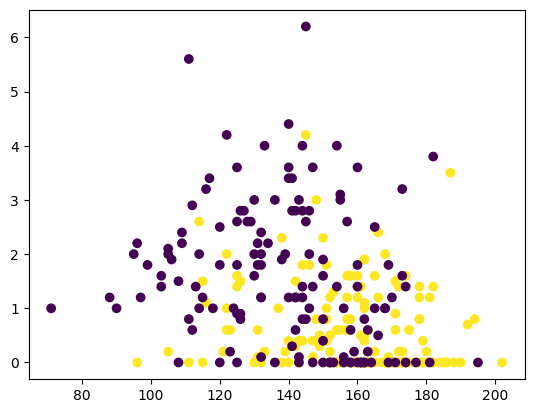

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df_corr["thalach"], df_corr["oldpeak"], c=df_corr["target"])

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = np.array(df_corr[["oldpeak", "thalach"]])
y = np.array(df_corr["target"])

model = LogisticRegression()
model.fit(X, y)

pred=model.predict(X)
acc=accuracy_score(y, pred)

print(f"Accuracy: {acc}")

Accuracy: 0.7392739273927392


## Visualisation of decision boundaries

C:\Users\chris\AppData\Local\Temp\ipykernel_14424\4012091111.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


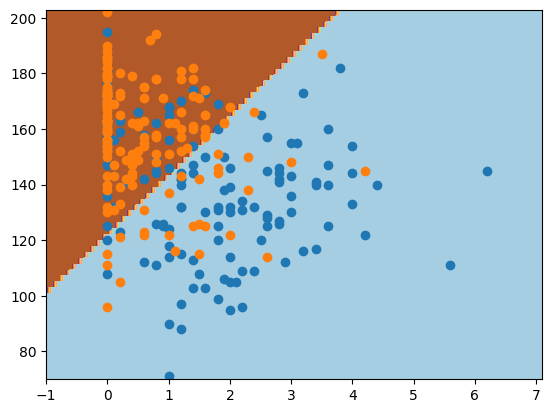

In [9]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

We can see that the calssifying works, as the 2 chosen classes don't overlap too much

## Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#sellecting values for all hyperparemeters
params_grid = {
    "max_depth": [3, 5, 10, 20, 25],  
    "min_samples_split": [5, 10, 15, 20, 25],
    "min_samples_leaf": [5, 10, 15],
    "min_weight_fraction_leaf": [0.05, 0.1, 0.2],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [2, 5, 10, 20, 40],
    "min_impurity_decrease": [0, 0.01, 0.05] #A node will be split if this split induces a decrease of the impurity greater than or equal to this value
}

dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtree, param_grid=params_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters are: {best_params}")

Best parameters are: {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0, 'min_samples_leaf': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.05}


## Notes
 - **Grid Search** - algorithm searches thru every posible combination of parametres
 - **Hyperparameters**
    - *max_depth* - depth of the decision tree 
    - *min_samples_split* - minimum number of samples needed to split a leaf 
    - *min_samples_leaf* - the minimum samples a leaf node must have after a split
    - *min_weight_fraction_leaf* - the minimum fraction of the total weight required in a leaf node.
    - *max_features* - number of features to conssider (either a number or a proportion of features (sqrt or log2))
    - *max_leaf_nodes* - limits number of leaf nodes
    - *min_impurity_decrease* - A node will only be split if the decrease in impurity resulting from the split is at least this value.

## Ploting Accuracies for Different Hyperparameters

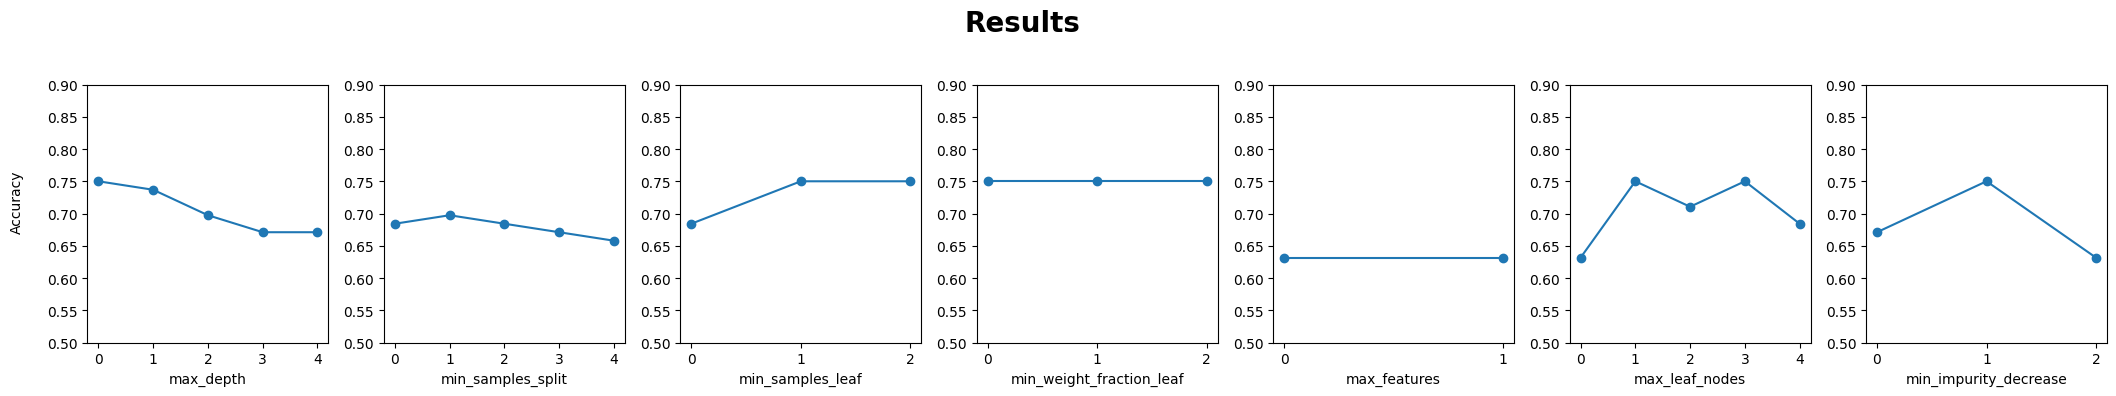

In [ ]:
fig, axes = plt.subplots(1, 7, figsize = (22, 4)) #creating subplots
plt.suptitle("Results", fontweight = "bold", fontsize = 20)

"""
Looping thru param keys, selecting the arguments 
for the classifier, fitting, getting accuracies,
than plotting
"""

for key, ax in zip(params_grid.keys(), axes):   
    accuracies = []
    values = list(params_grid[key])
    for value in values:
        args = {key: value, "random_state": 42}
        decision_tree = DecisionTreeClassifier(**args)

        decision_tree.fit(X_train, y_train)
        pred = decision_tree.predict(X_test)
        acc = accuracy_score(y_test, pred)
        accuracies.append(acc)

    ax.plot(accuracies, marker="o")

     # Set y-axis limits
    ax.set_ylim(0.5, 0.9)

    # Add x-labels for each subplot
    ax.set_xticks(range(len(values)))
    ax.set_xlabel(key)  # x-label for each subplot
    
fig.text(0.04, 0.5, "Accuracy", va="center", rotation="vertical")

plt.tight_layout(rect=[0.05, 0, 1, 0.95])  # Adjust layout to make space for the y-axis label


#FOR TRAINING DATA#

## Exporting Tree with Best Hyperparameters

Accuracy: 0.7105263157894737


[Text(0.625, 0.875, 'x[0] <= 1.95\ngini = 0.496\nsamples = 227\nvalue = [103, 124]'),
 Text(0.5, 0.625, 'x[1] <= 146.5\ngini = 0.456\nsamples = 185\nvalue = [65, 120]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[1] <= 120.5\ngini = 0.497\nsamples = 61\nvalue = [33, 28]'),
 Text(0.125, 0.125, 'gini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 45\nvalue = [22, 23]'),
 Text(0.75, 0.375, 'x[1] <= 169.5\ngini = 0.383\nsamples = 124\nvalue = [32, 92]'),
 Text(0.625, 0.125, 'gini = 0.439\nsamples = 80\nvalue = [26, 54]'),
 Text(0.875, 0.125, 'gini = 0.236\nsamples = 44\nvalue = [6, 38]'),
 Text(0.75, 0.625, 'gini = 0.172\nsamples = 42\nvalue = [38, 4]'),
 Text(0.6875, 0.75, '  False')]

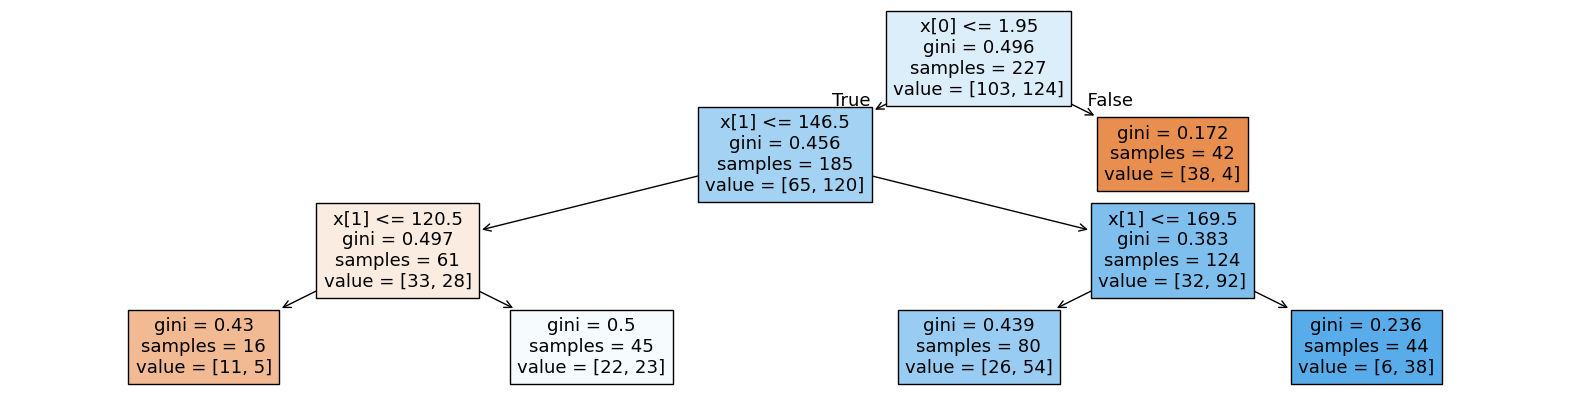

In [63]:
from sklearn import tree

fig = plt.figure(figsize=(20, 5))

best_dtree = DecisionTreeClassifier(**best_params)

best_dtree.fit(X_train, y_train)
best_pred = best_dtree.predict(X_test)

best_acc = accuracy_score(y_test, best_pred)
print(f"Accuracy: {best_acc}")

tree.plot_tree(best_dtree, filled=True)